### Gradient Boosting with XG-Boost

First contact with gradient boosting. 

* Docu: https://xgboost.readthedocs.io/en/latest/

* Parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

* [Early Stopping](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/)

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.model_selection import train_test_split

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
!pip install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


# Classification

Note that classification in XBost is not limited to the binary case.

In [50]:
import xgboost as xgb

In [51]:
# Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [52]:
#Digits Dataset
# from sklearn.datasets import load_digits
# digits = load_digits()
# X, y = digits.data, digits.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [54]:
from xgboost import XGBClassifier
model = XGBClassifier(
    max_depth=5, #Depth of trees
    learning_rate =0.1,
    n_estimators=1000, #Number of trees
    subsample=0.8 
)

In [55]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["mlogloss","merror"], eval_set = eval_set, verbose=False)
res = model.evals_result()

In [56]:
XGBClassifier.get_params(model)
# Note that the objective': multi:softprob

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.8,
 'verbosity': 1}

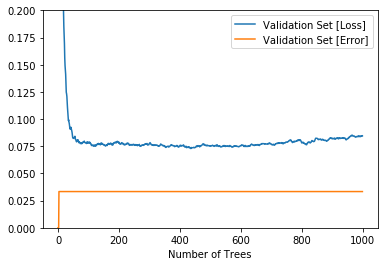

In [57]:
plt.plot(res['validation_0']['mlogloss'])
plt.plot(res['validation_0']['merror'])
plt.xlabel('Number of Trees')
plt.ylim(0,0.2)
plt.xlim()
plt.legend(['Validation Set [Loss]','Validation Set [Error]'])

In [58]:
res = model.predict_proba(X_test)
np.round(res[0:10],2)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.02, 0.98],
       [0.01, 0.99, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.09, 0.91],
       [0.  , 0.01, 0.99],
       [0.01, 0.99, 0.  ]], dtype=float32)

In [59]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05,  0.30 ] ,
     "max_depth" : [ 3, 15]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'eta': [0.05, 0.3], 'max_depth': [3, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_

# Regression (Gaussian)

In [60]:
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
X_train = d['Xt'] #"livebait","camper","persons","child"
X_test = d['Xte']
y_train = d['yt']
y_test = d['yte']
pd.DataFrame(X_test[0:2])

,0,1,2,3
0,0.0,0.0,3.0,0.0
1,1.0,0.0,3.0,1.0


In [24]:
from xgboost import XGBRegressor
model = XGBRegressor(
    max_depth=5, #Depth of trees
    learning_rate =0.01,
    n_estimators=1000, #Number of trees
    subsample=0.5
)
model.get_params()
model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.5,
 'verbosity': 1}

In [25]:
eval_set = [(X_test, y_test), (X_train, y_train)]
model.fit(X_train, y_train, eval_set = eval_set,verbose=False)
res = model.evals_result()

[20:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


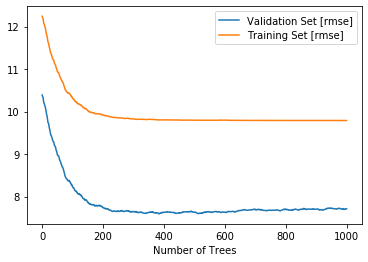

In [26]:
plt.plot(res['validation_0']['rmse'])
plt.plot(res['validation_1']['rmse'])
plt.xlabel('Number of Trees')
plt.xlim()
plt.legend(['Validation Set [rmse]', 'Training Set [rmse]'])

In [27]:
res = model.predict(X_test)
sigma_hat_2 = np.mean((res - y_test)**2)
np.sqrt(sigma_hat_2)

7.7125907

In [28]:
0.5*np.log(2 * np.pi * sigma_hat_2) + 0.5*np.mean((y_test - res.flatten())**2)/sigma_hat_2

3.461792708338911

In the linear regression example we had NLL_lr = 3.5693

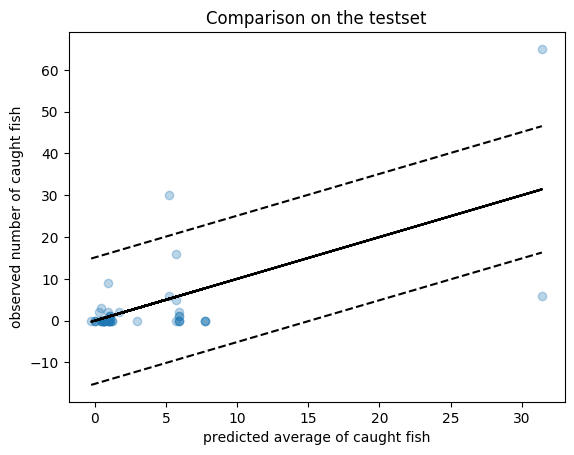

In [33]:
ypred=res
plt.scatter(ypred, y_test,alpha=0.3)
sort_idx=np.argsort(ypred,axis=0)
plt.plot(ypred[sort_idx].flatten(), ypred[sort_idx].flatten()+1.96*np.sqrt(sigma_hat_2),linestyle='dashed',c="black")
plt.plot(ypred[sort_idx].flatten(), ypred[sort_idx].flatten()-1.96*np.sqrt(sigma_hat_2),linestyle='dashed',c="black")
plt.plot(ypred, ypred, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of caught fish')
plt.ylabel('observed number of caught fish')
# plt.xlim(-5,15)
# plt.ylim(-5,15)
plt.show()

# Regression (Poisson)

In [36]:
from xgboost import XGBRegressor
model = XGBRegressor(
    max_depth=3, #Depth of trees
    #booster='gblinear', #Uncomment for trees
    learning_rate =0.01,
    n_estimators=500, #Number of trees
    subsample=0.5 ,
    objective="count:poisson"
)
model.get_params()
model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 500,
 'nthread': 1,
 'objective': 'count:poisson',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.5,
 'verbosity': 1}

In [37]:
eval_set = [(X_test, y_test), (X_train, y_train)]
model.fit(X_train, y_train, eval_set = eval_set,verbose=False)
res = model.evals_result()

3.164677

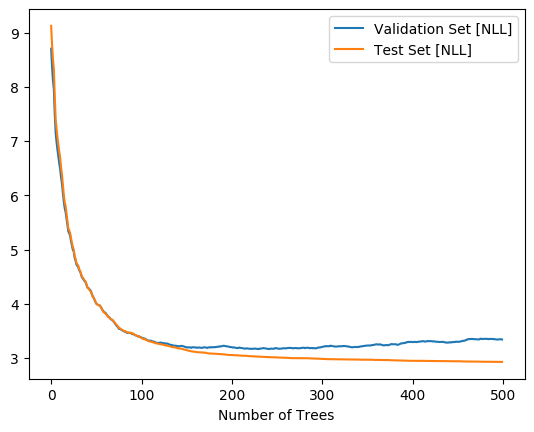

In [38]:
plt.plot(res['validation_0']['poisson-nloglik'])
plt.plot(res['validation_1']['poisson-nloglik'])
plt.xlabel('Number of Trees')
plt.xlim()
plt.legend(['Validation Set [NLL]', 'Test Set [NLL]'])
d = np.array(res['validation_0']['poisson-nloglik'])
#plt.ylim(1.3,2)
d.min()

In [39]:
res = model.predict(X_test)
sigma_hat_2 = np.mean((res - y_test)**2)
np.sqrt(sigma_hat_2)

7.48311

In [40]:
mu = res
ret = np.zeros_like(mu)
for i in range(ret.shape[0]):
  ret[i] = mu[i] - y_test[i]*np.log(mu[i]) + np.log(1.0*np.math.factorial(y_test[i]))
np.mean(ret)

3.3422153

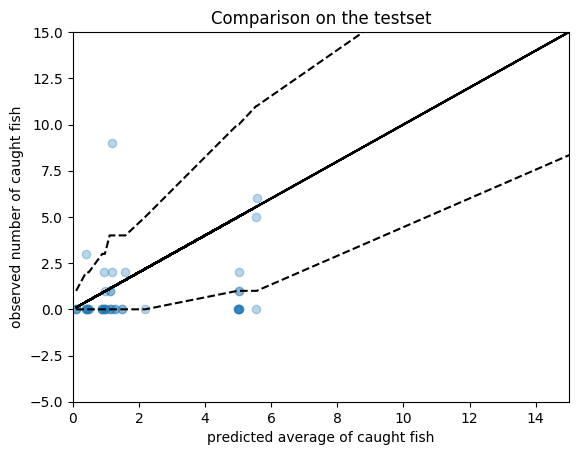

In [41]:
mupred=res
plt.scatter(mupred, y_test,alpha=0.3)
sort_idx=np.argsort(mupred,axis=0)
from scipy.stats import poisson
lower=poisson.ppf(0.025, mupred)
upper=poisson.ppf(0.975, mupred)
plt.plot(mupred[sort_idx].flatten(), lower[sort_idx],linestyle='dashed',c="black")
plt.plot(mupred[sort_idx].flatten(), upper[sort_idx],linestyle='dashed',c="black")
plt.plot(mupred, mupred, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of caught fish')
plt.ylabel('observed number of caught fish')
plt.xlim(0,15)
plt.ylim(-5,15)
plt.show()

# Cat-Boost

In [1]:
pip install catboost

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [37]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
print(model.get_params())
model.fit(X_train, y_train, eval_set = eval_set,verbose=False)
res = model.predict(X_test)
sigma_hat_2 = np.mean((res - y_test)**2)
np.sqrt(sigma_hat_2),0.5*np.log(2 * np.pi * sigma_hat_2) + 0.5*np.mean((y_test - res.flatten())**2)/sigma_hat_2

{'loss_function': 'RMSE'}


(7.734094177916611, 3.464576903444757)

Catboost supports many loss functions. See https://catboost.ai/docs/concepts/loss-functions-regression.html

In [46]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='Poisson')
print(model.get_params())
model.fit(X_train, y_train, eval_set = eval_set,verbose=False)
res = model.predict(X_test)
sigma_hat_2 = np.mean((res - y_test)**2)
print('MSE ', np.sqrt(sigma_hat_2))

mu = np.exp(res)
ret = np.zeros_like(mu)
for i in range(ret.shape[0]):
  ret[i] = mu[i] - y_test[i]*np.log(mu[i]) + np.log(1.0*np.math.factorial(y_test[i]))
np.mean(ret)

{'loss_function': 'Poisson'}
MSE  10.143981806814812


3.721045566804973

## Dear Data Set

In [62]:
try:
    import feather
except:
    !pip install feather-format
    import feather

In [63]:
def get_if_not_there(filename = 'deer_train.feather'):
    if not os.path.isfile(filename):
         urlretrieve('https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/{}'.format(filename),
                    filename = filename)

get_if_not_there('deer_train.feather')
get_if_not_there('deer_test.feather')

In [111]:
df_train = feather.read_dataframe('deer_train.feather')
df_test = feather.read_dataframe('deer_test.feather')
df_train

,wild,year,time,daytime,weekday
0,0,2002.0,0.000000,night.am,Sunday
1,0,2002.0,0.020833,night.am,Sunday
2,0,2002.0,0.041667,night.am,Sunday
3,1,2002.0,0.062500,night.am,Sunday
4,3,2002.0,0.083333,night.am,Sunday
...,...,...,...,...,...
140251,2,2009.0,2921.895833,night.pm,Sunday
140252,1,2009.0,2921.916667,night.pm,Sunday
140253,0,2009.0,2921.937500,night.pm,Sunday
140254,1,2009.0,2921.958333,night.pm,Sunday


In [112]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

#Without encoding
#With sin/cos
#{'loss_function': 'RMSE'}
#MSE  3.0217710422162205 NLL  2.524781630523
#{'loss_function': 'Poisson'}
#MSE  3.7650230 NLL 2.2941


#With sin/cos
#{'loss_function': 'RMSE'}
#MSE  2.689636782084301 NLL  2.4083446924542193
#{'loss_function': 'Poisson'}
#MSE  3.46892061202613 NLL 1.9104

#With sin only
#{'loss_function': 'RMSE'}
#MSE  2.8503108823273036 NLL  2.466366603054628
#{'loss_function': 'Poisson'}
#MSE  3.6090760637532986 NLL 2.076

dt_train = encode(df_train, 'time', 365)
df_test = encode(df_test, 'time', 365)
df_test[0:4]

,wild,year,time,daytime,weekday,time_cos
0,0,2010.0,2922.000000,night.am,Sunday,0.999407
1,2,2010.0,2922.020833,night.am,Sunday,0.999395
2,2,2010.0,2922.041667,night.am,Sunday,0.999382
3,2,2010.0,2922.062500,night.am,Sunday,0.999370


In [113]:
y_train = df_train.iloc[:,0].to_numpy(dtype='float32')
y_test = df_test.iloc[:,0].to_numpy(dtype='float32')
X_train = pd.get_dummies(df_train.iloc[:,2:]) #We wont use the year
X_test = pd.get_dummies(df_test.iloc[:,2:])
X_train.iloc[:,0] = X_train.iloc[:,0]/2922.02    #We divide by the maximal number to be in the range 0 to 1
X_test.iloc[:,0] = X_test.iloc[:,0]/2922.02 
del df_train, df_test
X_train = X_train.to_numpy(dtype='float32')
X_test = X_test.to_numpy(dtype='float32')

X_train.shape,X_test.shape

((140256, 17), (35040, 17))

In [116]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
print(model.get_params())
eval_set = [(X_test, y_test), (X_train, y_train)]
model.fit(X_train, y_train, eval_set = eval_set,verbose=False)
res = model.predict(X_test)
sigma_hat_2 = np.mean((res - y_test)**2)
print('MSE ',np.sqrt(sigma_hat_2),
      'NLL ',0.5*np.log(2 * np.pi * sigma_hat_2) + 0.5*np.mean((y_test - res.flatten())**2)/sigma_hat_2)



{'loss_function': 'RMSE'}
MSE  2.766092491495529 NLL  2.436374204606735


In [118]:
res_train = model.predict(X_train)
sig2 = np.mean((res_train - y_train)**2)
0.5*np.log(2 * np.pi * sig2) + 0.5*np.mean((y_test - res.flatten())**2)/sig2

2.463126639054369

In [115]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='Poisson')
print(model.get_params())
model.fit(X_train, y_train, eval_set = eval_set,verbose=False)
res = model.predict(X_test)
sigma_hat_2 = np.mean((res - y_test)**2)
print('MSE ', np.sqrt(sigma_hat_2))

mu = np.exp(res)
ret = np.zeros_like(mu)
for i in range(ret.shape[0]):
  ret[i] = mu[i] - y_test[i]*np.log(mu[i]) + np.log(1.0*np.math.factorial(y_test[i]))
np.mean(ret)

{'loss_function': 'Poisson'}
MSE  3.430679775391371


1.9783198745349264